In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/yellow_tripdata_2018-01.csv')
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [4]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format = '%Y-%m-%d %H:%M:%S')

In [5]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],format = '%Y-%m-%d %H:%M:%S')

In [6]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [7]:
df['speed'] = df['trip_distance']/(df['duration'].dt.total_seconds())
df['speed'] = (df['speed'] * 3600) * 1.609344

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,speed
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,00:03:18,14.630400
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,00:18:10,14.351214
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,00:05:55,13.056087
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,00:32:29,30.320735
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,00:17:48,13.561888


In [20]:
data = df[['fare_amount','speed','trip_distance','duration','total_amount','extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']]
data.duration = data['duration'].dt.total_seconds()
data['PULocationID'] = df.PULocationID
data['DOLocationID'] = df.DOLocationID
data.head()

/home/quant/.virtualenvs/analytics-3/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/quant/.virtualenvs/analytics-3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/quant/.virtualenvs/analytics-3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,PULocationID,DOLocationID
0,4.5,14.630400,0.5,198.0,5.80,0.5,0.5,0.00,0.0,0.3,41,24
1,14.0,14.351214,2.7,1090.0,15.30,0.5,0.5,0.00,0.0,0.3,239,140
2,6.0,13.056087,0.8,355.0,8.30,0.5,0.5,1.00,0.0,0.3,262,141
3,33.5,30.320735,10.2,1949.0,34.80,0.5,0.5,0.00,0.0,0.3,140,257
4,12.5,13.561888,2.5,1068.0,16.55,0.5,0.5,2.75,0.0,0.3,246,239


In [21]:
data = data.groupby(['DOLocationID','PULocationID']).mean()
data = data.reset_index()
data.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,1,1,75.622168,861.971024,1.567645,284.265421,89.617383,0.047664,0.16729,10.542972,2.944579,0.29271
1,1,4,62.900000,49.172246,15.826000,1889.800000,90.636000,0.000000,0.00000,14.446000,12.600000,0.30000
2,1,7,90.500000,65.509465,27.660000,2526.500000,112.680000,0.000000,0.00000,0.000000,21.880000,0.30000
3,1,10,110.000000,71.572720,35.750000,2881.000000,156.575000,0.250000,0.00000,26.095000,19.930000,0.30000
4,1,12,73.625000,42.373314,18.682500,2961.000000,92.140000,0.250000,0.00000,3.965000,14.000000,0.30000


In [22]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

data = data[data.DOLocationID != data.PULocationID]
data = data.drop_duplicates(['DOLocationID','PULocationID'])
data.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
1,1,4,62.900000,49.172246,15.826000,1889.800000,90.636,0.00,0.0,14.446000,12.600000,0.3
2,1,7,90.500000,65.509465,27.660000,2526.500000,112.680,0.00,0.0,0.000000,21.880000,0.3
3,1,10,110.000000,71.572720,35.750000,2881.000000,156.575,0.25,0.0,26.095000,19.930000,0.3
4,1,12,73.625000,42.373314,18.682500,2961.000000,92.140,0.25,0.0,3.965000,14.000000,0.3
6,1,14,128.666667,71.014176,25.406667,2056.333333,188.260,0.00,0.0,27.406667,31.886667,0.3


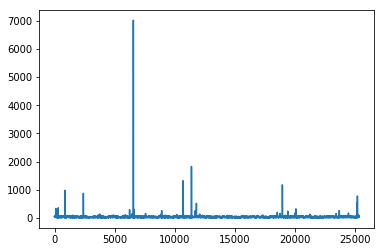

In [23]:
data['speed'].plot()

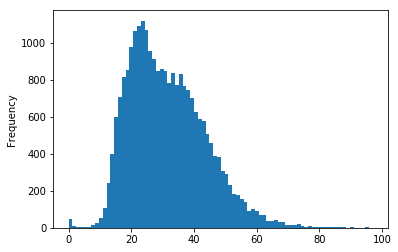

In [24]:
data['speed'][data['speed']<=100].plot.hist(bins=80)

In [25]:
data['speed'][data['speed']<=100].mean()

31.513824123265774

In [26]:
#based on One sample t-test 
from scipy.stats import ttest_1samp
import numpy as np

accepted_speed=[]
for i in range(25,40):
    tset, pval = ttest_1samp(data['speed'], i)
    print('p-values',pval)
    if pval < 0.05:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    else:
        print("we are accepting null hypothesis")
        accepted_speed.append(i)
accepted_speed

p-values 1.0296710400049755e-115
 we are rejecting null hypothesis
p-values 7.621837392162684e-87
 we are rejecting null hypothesis
p-values 4.3476833409076265e-62
 we are rejecting null hypothesis
p-values 1.6918708500398605e-41
 we are rejecting null hypothesis
p-values 4.0947442471836946e-25
 we are rejecting null hypothesis
p-values 5.855974885358776e-13
 we are rejecting null hypothesis
p-values 5.095743403644793e-05
 we are rejecting null hypothesis
p-values 0.37016808737864915
we are accepting null hypothesis
p-values 0.023857717749284694
 we are rejecting null hypothesis
p-values 6.176054934120761e-08
 we are rejecting null hypothesis
p-values 1.084546717157159e-17
 we are rejecting null hypothesis
p-values 1.126858819254066e-31
 we are rejecting null hypothesis
p-values 7.027695672834141e-50
 we are rejecting null hypothesis
p-values 2.825353819121741e-72
 we are rejecting null hypothesis
p-values 8.141539958124556e-99
 we are rejecting null hypothesis


[32]

In [27]:
data['target'] = data.speed.apply(lambda x: 1 if x>32 else 0)
data.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
1,1,4,62.900000,49.172246,15.826000,1889.800000,90.636,0.00,0.0,14.446000,12.600000,0.3,1
2,1,7,90.500000,65.509465,27.660000,2526.500000,112.680,0.00,0.0,0.000000,21.880000,0.3,1
3,1,10,110.000000,71.572720,35.750000,2881.000000,156.575,0.25,0.0,26.095000,19.930000,0.3,1
4,1,12,73.625000,42.373314,18.682500,2961.000000,92.140,0.25,0.0,3.965000,14.000000,0.3,1
6,1,14,128.666667,71.014176,25.406667,2056.333333,188.260,0.00,0.0,27.406667,31.886667,0.3,1


In [29]:
data.to_csv('averaged_data.csv',index = False)
data.describe()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
count,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000
mean,135.790210,142.337047,29.413837,32.283984,8.813329,1901.735404,34.812189,0.363043,0.493486,2.921667,1.298803,0.299644,0.440856
std,76.620049,75.947454,16.537007,49.966328,5.664794,3087.516378,20.179123,0.341583,0.047145,3.518043,3.231613,0.006575,0.496500
min,1.000000,1.000000,0.000000,0.000000,0.000000,-607.909465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,79.000000,17.238068,22.174323,4.398989,1119.000000,20.300000,0.200000,0.500000,0.540152,0.000000,0.300000,0.000000
50%,137.000000,143.000000,26.812500,29.893698,7.865000,1586.649254,31.300000,0.366667,0.500000,2.084402,0.000000,0.300000,0.000000
75%,202.000000,216.000000,39.000000,39.348012,12.331667,2130.944444,45.176700,0.500000,0.500000,3.984500,0.960000,0.300000,1.000000
max,265.000000,265.000000,286.500000,7012.619919,77.956667,86344.000000,363.380000,12.500000,0.500000,116.230000,194.748000,0.300000,1.000000
